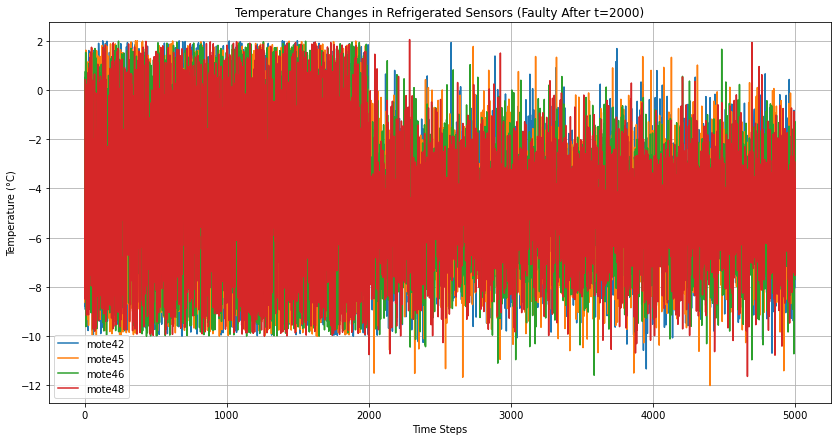

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 5000

# Define the nodes (sensors)
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Stable room conditions for most sensors (normal fluctuations around 20°C)
for node in nodes:
    if node not in ['mote42', 'mote45', 'mote46', 'mote48']:
        data[node] = np.random.normal(loc=20, scale=0.1, size=time_steps)  # Small fluctuations around 20°C

# Refrigerated spaces for nodes 42, 45, 46, 48 (gradual changes between -10°C and 2°C for t <= 2000)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][:2000] = np.random.uniform(low=-10, high=2, size=2000)  # Gradual changes between -10°C and 2°C
    data[node][:1] = -5  # Set the initial value to -5°C

# After t > 2000, rapid changes for nodes 42, 45, 46, 48 (faulty conditions)
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    data[node][2000:] = np.random.normal(loc=-5, scale=2, size=time_steps-2000)  # Rapid changes around -5°C

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_three.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote42', 'mote45', 'mote46', 'mote48']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes in Refrigerated Sensors (Faulty After t=2000)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 5000

# Define the nodes
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Rapid changes for nodes 2, 4, 5, 20 from time steps 0 to 2000, then normal changes
for node in ['mote2', 'mote4', 'mote5', 'mote20']:
    data[node][:2000] = np.random.normal(loc=20, scale=0.5, size=2000)  # Rapid changes
    data[node][2000:] = np.random.normal(loc=20, scale=0.1, size=time_steps-2000)  # Normal changes

# Regular changes for nodes 25, 30, 32, 40 from time steps 0 to 2000, then rapid changes
for node in ['mote25', 'mote30', 'mote32', 'mote40']:
    data[node][:2000] = np.random.normal(loc=20, scale=0.1, size=2000)  # Normal changes
    data[node][2000:] = np.random.normal(loc=20, scale=0.5, size=time_steps-2000)  # Rapid changes

# Add normal changes to other nodes (remaining nodes remain stable or gradual throughout)
for node in nodes:
    if node not in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
        data[node] = np.random.normal(loc=20, scale=0.1, size=time_steps)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_two.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Changes in Selected Nodes Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of time steps
time_steps = 20000

# Define the nodes
nodes = [f'mote{i}' for i in range(1, 51)]

# Initialize the DataFrame
data = {node: np.zeros(time_steps) for node in nodes}
data['SN'] = np.arange(time_steps)

# Function to alternate between rapid and normal changes every 4000 time steps
def generate_alternating_changes(time_steps, interval, loc=20, rapid_scale=1.0, normal_scale=0.2):
    values = np.zeros(time_steps)
    for i in range(0, time_steps, interval):
        if (i // interval) % 2 == 0:  # Even intervals: rapid changes
            values[i:i+interval] = np.random.normal(loc=loc, scale=rapid_scale, size=min(interval, time_steps - i))
        else:  # Odd intervals: normal changes
            values[i:i+interval] = np.random.normal(loc=loc, scale=normal_scale, size=min(interval, time_steps - i))
    return values

# Apply alternating changes to nodes 2, 4, 5, 20
for node in ['mote2', 'mote4', 'mote5', 'mote20']:
    data[node] = generate_alternating_changes(time_steps, interval=4000, loc=20, rapid_scale=1.0, normal_scale=0.2)

# Regular changes for nodes 25, 30, 32, 40 from time steps 0 to 2000, then rapid changes
for node in ['mote25', 'mote30', 'mote32', 'mote40']:
    data[node][:2000] = np.random.normal(loc=20, scale=0.2, size=2000)  # Normal changes
    data[node][2000:] = np.random.normal(loc=20, scale=1.0, size=time_steps-2000)  # Rapid changes

# Add normal changes to other nodes (remaining nodes remain stable or gradual throughout)
for node in nodes:
    if node not in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
        data[node] = np.random.normal(loc=20, scale=0.2, size=time_steps)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('synthetic_scenario_alternating.csv', index=False)

# Plot to visualize the changes
plt.figure(figsize=(14, 7))
for node in ['mote2', 'mote4', 'mote5', 'mote20', 'mote25', 'mote30', 'mote32', 'mote40']:
    plt.plot(df['SN'], df[node], label=node)
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Changes in Selected Nodes Over Time')
plt.legend()
plt.grid(True)
plt.show()
